In [1]:
'''
Implement a single layered perceptron to classify the data using keras
'''

'\nImplement a single layered perceptron to classify the data using keras\n'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

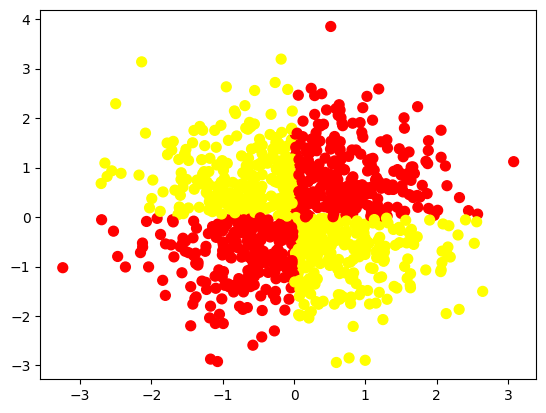

In [4]:
#make random data
np.random.seed(42)
X = np.random.randn(1000, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)

#plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [5]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [6]:
#build the model
model = keras.Sequential([
    layers.Dense(1, input_shape=(2,), activation='sigmoid')
])
#compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

#evaluate the model
model.evaluate(X_test, y_test)

2022-10-19 11:06:44.875415: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 501us/step - loss: 0.6941 - accuracy: 0.5650


[0.6941016316413879, 0.5649999976158142]

7/7 [==============================] - 0s 550us/step


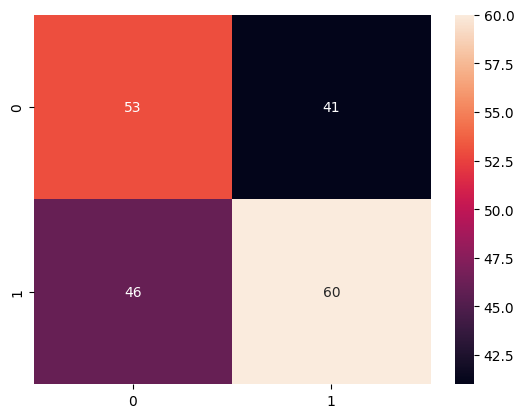

In [9]:

#predict the model
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


              precision    recall  f1-score   support

           0       0.54      0.56      0.55        94
           1       0.59      0.57      0.58       106

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.57       200

79/79 [==============================] - 0s 503us/step


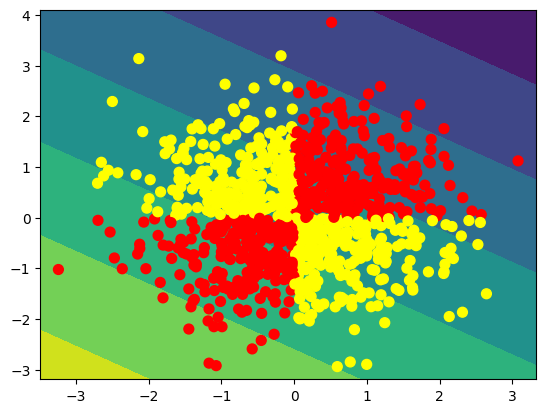

In [10]:
#plot the classification report
print(classification_report(y_test, y_pred))

#plot the decision boundary


def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


plot_decision_boundary(X, y, model)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()
